<a href="https://colab.research.google.com/github/dsliwka/EEMP2023/blob/main/ManagementPracticesSampleSolutionsWithComments.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [51]:
import pandas as pd
import numpy as np

import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.iolib.summary2 import summary_col
import seaborn as sns
!pip install Stargazer
from stargazer.stargazer import Stargazer

from sklearn.utils import resample


In [52]:
path_to_data = 'https://raw.githubusercontent.com/dsliwka/EEMP2023/main/Data/AMP_Data.csv'
df = pd.read_csv(path_to_data)


# **The World Magement Survey: Inspecting the Data**

----

- First inspect the data set
- Look at the distribution of variables with histplot
- Inspect associations in the data graphically with regplot

---



In [53]:
df

,Unnamed: 0,account_id,d5sales,factor_management,ldegree_t,lean1,lean2,management,mne_country,mne_d,...,hour,duration_miss,reliability_miss,i_seniority_miss,i_comptenure_miss,hour_miss,ldegree_t_miss,sales,emp,ppent
0,0,1,0.374976,0.634742,0.000000,3.0,3.00,3.500000,NaN,0,...,18.00,0,1,0,0,0,1,88585.01,403.00003,10828.998
1,1,1,0.626065,0.460456,0.000000,4.0,4.00,3.333333,NaN,0,...,18.00,0,1,0,0,0,1,116900.99,405.00003,9241.004
2,2,1,0.032071,0.286170,4.366278,5.0,5.00,3.166667,NaN,0,...,18.00,0,0,0,0,0,0,103448.01,410.00000,8946.000
3,3,2,0.227196,2.285633,0.000000,4.5,4.50,4.555555,NaN,0,...,15.00,0,0,0,0,0,1,246291.10,670.99994,69757.984
4,4,3,0.213310,1.911630,0.000000,3.5,4.00,4.333333,NaN,0,...,14.00,0,1,0,0,0,1,454517.12,1627.00000,89360.970
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7089,7089,2926,0.526407,0.791786,3.919783,2.5,3.75,3.583333,NaN,0,...,19.75,0,0,0,0,0,0,262517.03,1313.00010,60770.004
7090,7090,2926,0.637338,0.808551,3.832232,3.0,3.50,3.611111,NaN,0,...,18.50,0,0,0,0,0,0,279724.94,1303.00020,60550.000
7091,7091,2926,0.355583,0.825316,3.744681,3.5,3.25,3.638889,NaN,0,...,17.25,0,0,0,0,0,0,245282.00,1164.99990,59896.016
7092,7092,2926,0.278019,0.842080,3.657131,4.0,3.00,3.666667,NaN,0,...,16.00,0,0,0,0,0,0,244552.10,1393.99990,67418.016


<Axes: xlabel='management', ylabel='Count'>

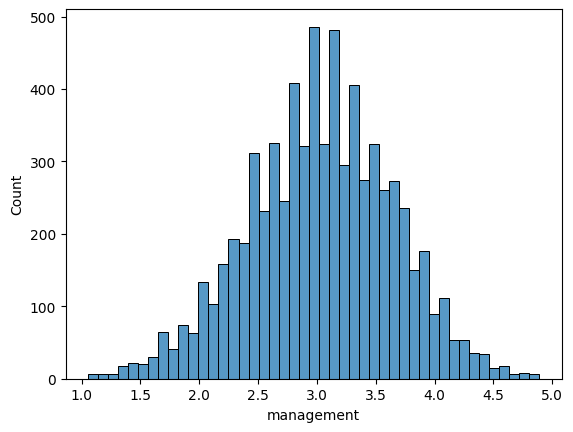

In [54]:
sns.histplot(df.management)

<Axes: xlabel='management', ylabel='roce'>

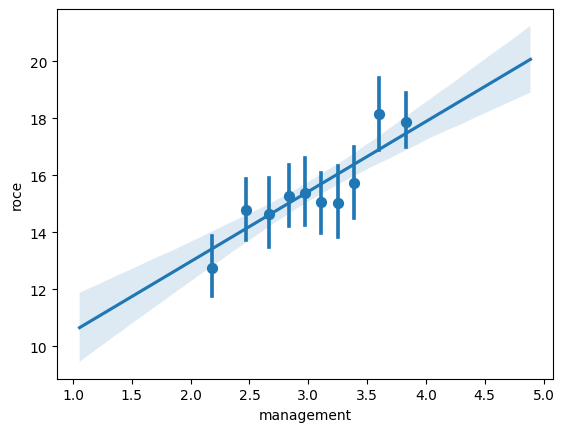

In [55]:
sns.regplot(x="management", y="roce", x_bins=10, data=df)

**Note:**
- If you have many observations, it is convenient to do a bin scatterplot instead of a scatterplot. Here we use 10 bins to look at average values of roce for sets of firms that have similar scores (the lowest dot is the average roce for firms with the 10% lowest management scores,...)


# **Study the association between Management Score and ROCE**
----

- We here just regress the return on capital employed on the management score:

In [56]:
reg=smf.ols("roce ~ management", data=df).fit()
Stargazer([reg])

**Interpretation:**

- A one score point higher management score is associated with a 2.45 percentage points higher return on capital

# **Is the Management Score equally predictive in different countries?**

----

- Here we study potential differences in the "predictiveness" of the management questionaire used by Bloom and van Reenen
- To do so, it is convenient to use interaction terms
- For simplicity we only consider Great Britain and China   


In [57]:
## generate a dummy variable for observations from China
df["ChinaD"]=(df.country=="China")*1
df.ChinaD.describe()

count    7094.000000
mean        0.081054
std         0.272938
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: ChinaD, dtype: float64

<Axes: xlabel='management', ylabel='country'>

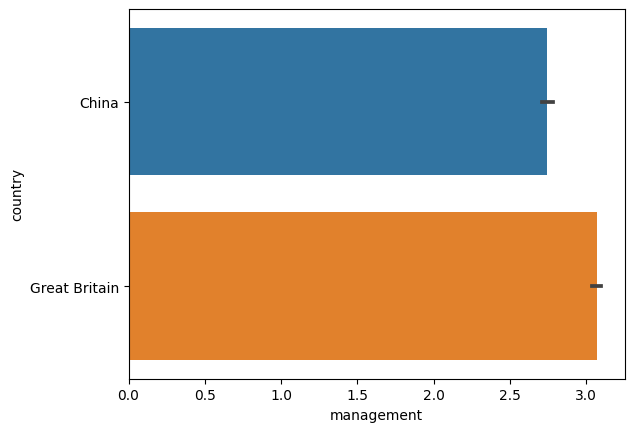

In [58]:
## Generate a new data frame that only contains obs from GB and China
dfn=df[(df.country=="Great Britain")|(df.country=="China")]
#Alternative: dfn=df[df.country.isin(["Great Britain","China"])]

## Inspect the scores for the two countries
sns.barplot(y="country", x="management", data=dfn)

- Now we regress roce on the management score interacting it with the dummy for observations from China
- Note: We can make the regression table slightly nicer, by ordering the variables and renaming them

In [59]:
reg1=smf.ols("roce ~ management", data=dfn).fit()
reg2=smf.ols("roce ~ management * ChinaD", data=dfn).fit()

tab=Stargazer([reg1,reg2])
tab.covariate_order(["management", "ChinaD", "management:ChinaD", "Intercept"])
tab.rename_covariates({"management": "Management","management:ChinaD": "China", "management:ChinaD": "Management x China"})
tab

**Interpretation**
- The management score is significantly less predictive in China as compared to GB
- While a one unit higher management score is associated with a 2.26 percentage points higher ROCE in GB, this association tends even to be genative in China (add up the 2.255 and the -3.958 to get the slope for China)
- To understand the interpretation of the interaction term a bit better, it can also be instructive to look at separate regressions, one using only the GB data and another one only using the data from China. We do that in the next cell

\


Side remark:
- We may be tempted to interpret the coefficient of the dummy variable ChinaD as the difference in ROCE between China and GB. But be careful, this is the difference at a management score of zero (which no firm in the data set has so we should be careful with the interpretation)
- To predict this difference for firms with a specific score you have to compute 12.108-3.958*management
- If you would want to also compare the country difference in the same regression you could for instance use a mean centered version of management, i.e. generate a variable df["managementCenter"]=df.management-df.managememt.mean()


In [60]:
reg1=smf.ols("roce ~ management", data=dfn).fit()
reg2=smf.ols("roce ~ management * ChinaD", data=dfn).fit()
reg3=smf.ols("roce ~ management", data=dfn[df.country=="Great Britain"]).fit()
reg4=smf.ols("roce ~ management", data=dfn[df.country=="China"]).fit()

tab=Stargazer([reg1,reg2,reg3,reg4])
tab.covariate_order(["management", "ChinaD", "management:ChinaD", "Intercept"])
tab.rename_covariates({"management": "Management","management:ChinaD": "China", "management:ChinaD": "Management x China"})
tab

<ipython-input-60-0638a0257d75>:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  reg3=smf.ols("roce ~ management", data=dfn[df.country=="Great Britain"]).fit()
<ipython-input-60-0638a0257d75>:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  reg4=smf.ols("roce ~ management", data=dfn[df.country=="China"]).fit()


**Note:**
-  You can compute the values in regs 3 and 4 from those in reg 2
- The coefficient of management in reg 3 (only GB) is just the coefficient of the management score (for ChinaD=0) in reg 2
- The coefficient of management in reg 4 (only China) is the sum of the  coefficient of the management score plus the coefficient of the interaction term in reg 2
- you can also graphically look at the associations as we do in the following


<Axes: xlabel='management', ylabel='roce'>

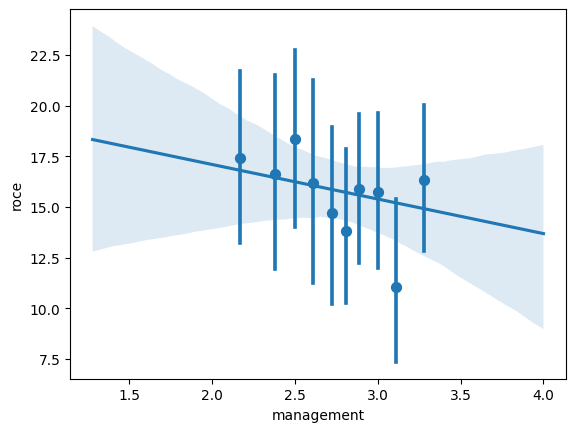

In [61]:
# Plot only data from China
sns.regplot(x="management", y="roce", x_bins=10, data=dfn[dfn.country=="China"])


<Axes: xlabel='management', ylabel='roce'>

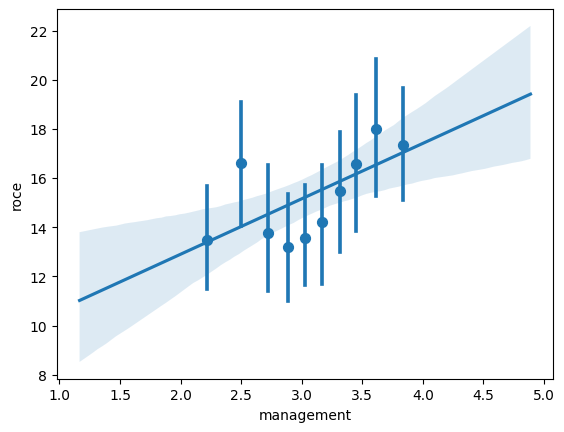

In [62]:
# Plot only data from GB
sns.regplot(x="management", y="roce", x_bins=10, data=dfn[dfn.country=="Great Britain"])

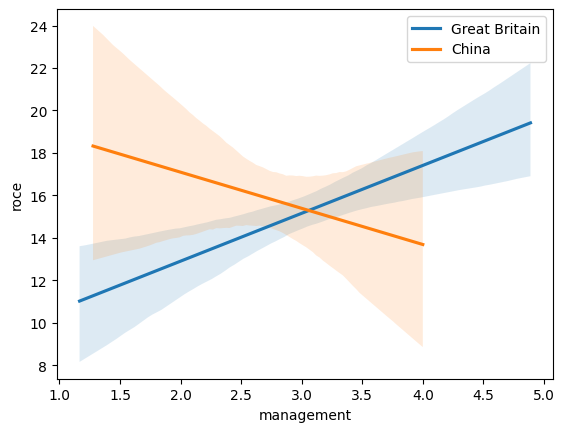

In [63]:
## Or plot them both in one graph and add a legend
import matplotlib.pyplot as plt
sns.regplot(x="management", y="roce", x_bins=10, scatter=False, label="Great Britain", data=dfn[dfn.country=="Great Britain"])
sns.regplot(x="management", y="roce", x_bins=10, scatter=False, label="China", data=dfn[dfn.country=="China"])
plt.legend()

# **Statistical Significance**
----

- To what extend can we now say that these associations are significant?
- Inspect the regression table again

In [64]:
tab

- Note: Stargazer shows the standard errors in brackets below the coefficients

\

Interpretation of coefficient of management:
- In reg 2 the standard error of management (which measures the predictive power for GB - i.e. when ChinaD=0) is 0.673
- If we divide the coefficient by the standard error we obtain the t-value, which here is 3.348
- It is larger than the 1.96 threshold for a significance level of 5% (it is also larger for the threshold for a 1% effect here). Stargazer therefore has marked the coefficient with three stars
- Hence, we reject the null hypothesis that there is no connection on average across the two countries, or we say: the coefficient is highly significant

\

Interpretation of interaction term:
- As we have seen already in the above, the cofficient of the interaction term is negative
- The standard error is 1.686 and the t-value thus -2.348
- The (absolute value) of the t-value again exceeds the threshold for a 1% significance level.
- Hence, we reject the null hypothesis that there is no difference in the predictive power of the management score between GB and China

\

Interpretation of the "net effect":
- Given that the sum of the coeficient for management and the interaction term (which captures the predictive power of management in China) is negative, we may be tempted to think that there is a negative association between management score and roce in China.
- To see whether this is indeed statistically significant, the easiest way is to just inspect the data from the regression that considered only China (reg 4).
- But here we see that, the coefficient is not significantly different from zero.  Hence, we cannot reject the null hypothesis that there is no association in China.

\

Summary:
- We have sigificant evidence that the management score is
  - predictive for ROCE in the UK
  - is more predictive for ROCE in the UK than in China
- We have no significant evidence that the management score is predictive in China (nor for the opposite). Here we have to conclude that the data does us not allow to make a strong statement.

\

Side remark (we have not covered this in class): After a regression we can also test hypothesis on linear functions of the coefficients with the t-test method. This also allows to test whether management+management:ChinaD is signficantly different from zero:


In [65]:
reg2.t_test("management + management:ChinaD = 0")

<class 'statsmodels.stats.contrast.ContrastResults'>
                             Test for Constraints                             
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
c0            -1.7033      1.545     -1.102      0.271      -4.734       1.328

- To obtain more detailed statistics on t-values, p-values, confidence bands, directly inspect the summary:

In [66]:
print(reg2.summary())

                            OLS Regression Results                            
Dep. Variable:                   roce   R-squared:                       0.006
Model:                            OLS   Adj. R-squared:                  0.004
Method:                 Least Squares   F-statistic:                     4.283
Date:                Mon, 13 Nov 2023   Prob (F-statistic):            0.00505
Time:                        10:58:56   Log-Likelihood:                -9266.6
No. Observations:                2203   AIC:                         1.854e+04
Df Residuals:                    2199   BIC:                         1.856e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             8.3915      2.10

# **Robust and Clustered Standard Errors**
-----

Here we consider
- Heteroscadiscity robust standard errors
- And then account for the fact that for many firms we have several obs from multiple years which are not independent:

In [75]:
reg1=smf.ols("roce ~ management", data=df).fit()
reg2=smf.ols("roce ~ management", data=df).fit(cov_type='HC2')
reg3=smf.ols("roce ~ management", data=df).fit(cov_type='cluster', cov_kwds={"groups": df.account_id})

Stargazer([reg1,reg2,reg3])

**Interpretation:**
You see that the standard errors get slightly bigger, when we account for both issues

# **Panel Analysis of the Management Practices Data**
----

- Here the task was to replicate Bloom et al (2012) where they estimate the association beteen log of a firm's sales and management score
- We use the data to estimate a fixed effects regression
- We make use of the fact that for many firms we have observations over several years
- The underlying issue is:
  - In our previous analyses there is likely a selection bias/OVB issue
  - For instance: Better managers generate higher sales but also likely introduce better management practice...
  - This was the reason that we avoided "causal language" in the above
- We have seen in the lecture that a fixed effects address may reduce this problem under specific assumptions
- In particular, when all omitted variables are constant over time and the causal effect of the variable of interest is additive and stable over time, the coefficient of this variable can be interepreted as an estimate of the causal effect
- Rough intuition: By adding dummy variables for each firm, we control for the unobserved time-constant heterogeneity in other drivers of sales
-


Note also:
- Bloom et al control for the log number of employees  (variable emp) and the capital employed (variable ppent)
- The firms have a unique ID: variable account_id
- The data set contains the year for which  the respective observation has been collected

A simple way to estimate a fixed effects regression in Statsmodels would be to add dummy variables for each firm
- But note: In a large data set like this one it takes very long to estimate (and generates a very long regression table)

Hence, it is much quicker & convenient to use a methods that uses the "de-meaning" transformation we have seen in the lecture.

- This is implemented in PanelOLS in the LinearModels package
- We have to install it first

In [67]:

!pip install linearmodels
from linearmodels import PanelOLS



PanelOLS needs a Mutiindex data frame where the index is the firm identifier and the time variable:

In [70]:
dfp=df.set_index(['account_id', 'year'])

We can then estimate a fixed effects model
- We can use the formula notation as in Statsmodels
- It is important to add the keywords "+EntityEffects + TimeEffects" to make sure that the demeaning transformation uses the firm identifier (i.e. averages across all obs from one firm) we control for year dummies
- As the obs from the same firm are not independent we have to estimate clustered standard errors (Note the different notation)
- In PanelOLS you obtain a summary by printing the instance (unfortunately, Stargazer doe not yet support Linearmodels)

In [74]:
regFE1 = PanelOLS.from_formula('np.log(sales) ~ management + np.log(emp) + np.log(ppent) + EntityEffects + TimeEffects', data=dfp).fit(cov_type="clustered", cluster_entity=True)
print(regFE1)

                          PanelOLS Estimation Summary                           
Dep. Variable:          np.log(sales)   R-squared:                        0.2076
Estimator:                   PanelOLS   R-squared (Between):              0.6534
No. Observations:                7094   R-squared (Within):               0.2095
Date:                Mon, Nov 13 2023   R-squared (Overall):              0.6519
Time:                        11:01:16   Log-likelihood                    432.78
Cov. Estimator:             Clustered                                           
                                        F-statistic:                      362.92
Entities:                        2927   P-value                           0.0000
Avg Obs:                       2.4236   Distribution:                  F(3,4156)
Min Obs:                       1.0000                                           
Max Obs:                       7.0000   F-statistic (robust):             8.5728
                            

We can also replicate the same specification without fixed effects:
(Note this looks slightly different from the table on the slide from Bloom at al (2012) as they additionally control for  industry and country etc.)

In [78]:
reg1 = smf.ols('np.log(sales) ~ management + np.log(emp) + np.log(ppent) + C(year)', data=df).fit(cov_type='cluster', cov_kwds={"groups": df.account_id})
print(reg1.summary())

                            OLS Regression Results                            
Dep. Variable:          np.log(sales)   R-squared:                       0.689
Model:                            OLS   Adj. R-squared:                  0.689
Method:                 Least Squares   F-statistic:                     423.2
Date:                Mon, 13 Nov 2023   Prob (F-statistic):               0.00
Time:                        11:11:14   Log-Likelihood:                -8942.3
No. Observations:                7094   AIC:                         1.791e+04
Df Residuals:                    7082   BIC:                         1.799e+04
Df Model:                          11                                         
Covariance Type:              cluster                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           2.9813      0.173     

**Interpretation**

- The coefficicient of management is substantially smaller in the fixed effects regression.
- This indicates that there indeed seems to be an important OVB issue
- But the coefficient is still highly significant
- We can thus still reject the null hypothesis that there is no connection

\

Note:
- The FE model uses the within firm variation of the management score
- A change in the score is significantly associated with a change in sales

\
Side remark:
- To the extend that the management score is measured with measurement error we may even underestimate the effect (attenuation bias)